In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\jopulgar\\df_extended_2.csv')


In [10]:
df.Label.value_counts()

1    344
0    211
Name: Label, dtype: int64

In [3]:
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# Descarga la lista de palabras de parada en español de NLTK
nltk.download('stopwords')
spanish_stopwords = stopwords.words('spanish')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jopulgar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
# División de datos en conjuntos de entrenamiento y prueba
X_train_raw, X_test_raw, y_train, y_test = train_test_split(df[['Conversación', 'Horario']], df['Label'], test_size=0.3, random_state=42)

# Vectorización del texto para los datos de entrenamiento
tfidf_vectorizer = TfidfVectorizer(stop_words=spanish_stopwords, max_features=500)
X_train_text = tfidf_vectorizer.fit_transform(X_train_raw['Conversación'])

# Aplicar la misma transformación a los datos de prueba
X_test_text = tfidf_vectorizer.transform(X_test_raw['Conversación'])

# One Hot Encoding de la columna "Horario" para los datos de entrenamiento
one_hot_encoder = OneHotEncoder()
X_train_horario = one_hot_encoder.fit_transform(X_train_raw[['Horario']]).toarray()

# Aplicar la misma codificación a los datos de prueba
X_test_horario = one_hot_encoder.transform(X_test_raw[['Horario']]).toarray()

# Combinar las características de texto y horario en conjuntos de entrenamiento y prueba
X_train = np.hstack((X_train_text.toarray(), X_train_horario))
X_test = np.hstack((X_test_text.toarray(), X_test_horario))


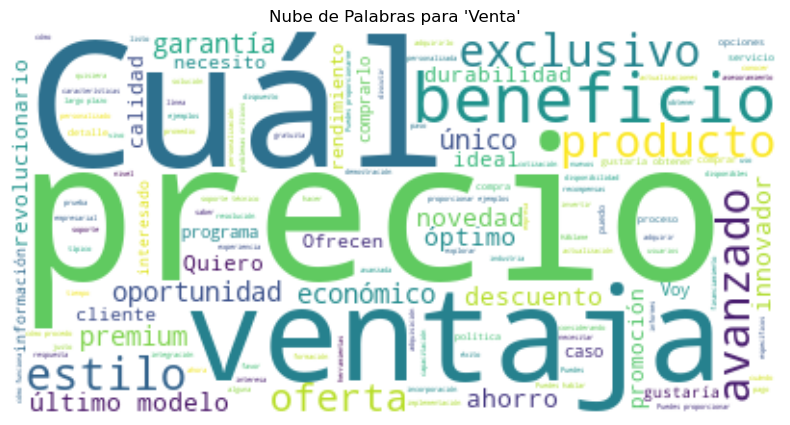

In [5]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Asegúrate de que X_train_raw y y_train sean tus datos de entrenamiento y etiquetas

# Filtrar los textos en tus datos de entrenamiento para cada etiqueta
textos_venta = X_train_raw[y_train == 1]['Conversación']
textos_no_venta = X_train_raw[y_train == 0]['Conversación']

# Unir todos los textos para cada etiqueta
texto_unido_venta = " ".join(texto for texto in textos_venta)
texto_unido_no_venta = " ".join(texto for texto in textos_no_venta)

# Crear y visualizar la nube de palabras para 'venta'
wordcloud_venta = WordCloud(stopwords=spanish_stopwords, background_color="white").generate(texto_unido_venta)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_venta, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'Venta'")
plt.show()



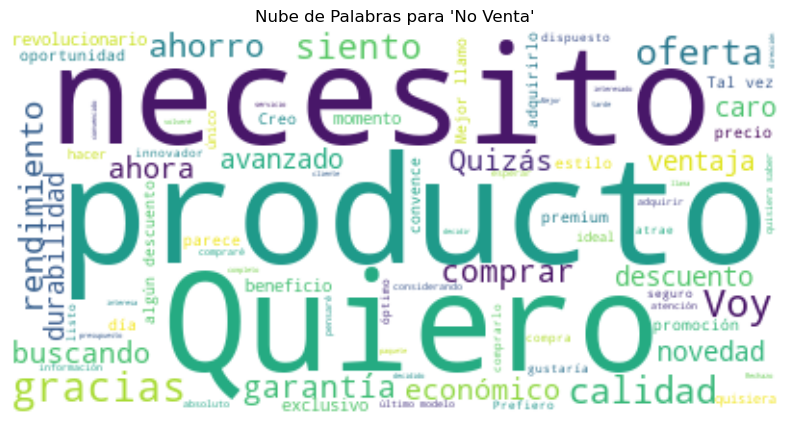

In [6]:
# Crear y visualizar la nube de palabras para 'no venta'
wordcloud_no_venta = WordCloud(stopwords=spanish_stopwords, background_color="white").generate(texto_unido_no_venta)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_no_venta, interpolation='bilinear')
plt.axis("off")
plt.title("Nube de Palabras para 'No Venta'")
plt.show()


Modelo KNN

In [32]:
# Modelo KNN
knn_model = KNeighborsClassifier(n_neighbors=7)

# Entrenar el modelo KNN con los datos de entrenamiento
knn_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred = knn_model.predict(X_test)



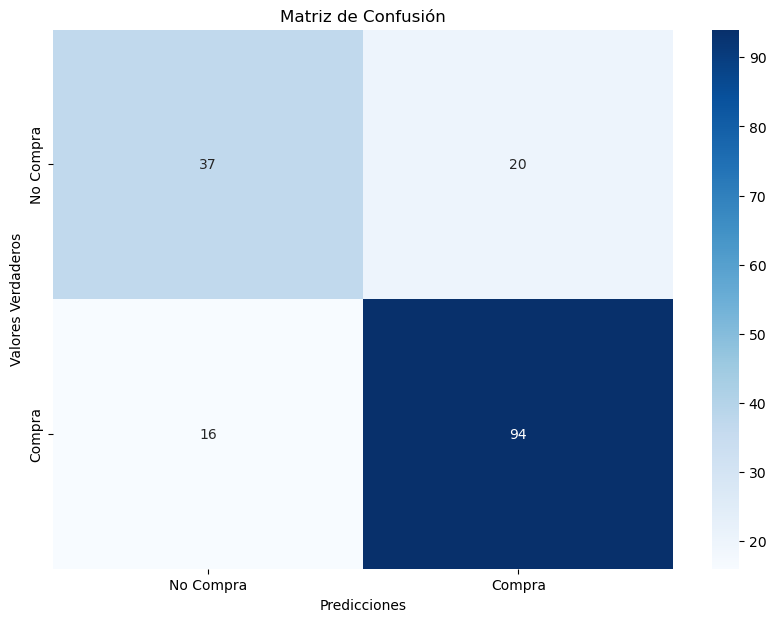

In [20]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que y_test son tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['No Compra', 'Compra']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


In [16]:
from sklearn.model_selection import GridSearchCV

# Configurar los parámetros que quieres buscar
param_grid = {
    'n_neighbors': [3, 5, 7, 10, 15]# Métricas de distancia a considerar
}

# Crear el modelo KNN que vas a usar
knn = KNeighborsClassifier()

# Crear el GridSearchCV
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Ajustar el GridSearchCV a tus datos de entrenamiento
grid_search.fit(X_train, y_train)

# Ver los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Mejor score encontrado
print("Mejor score de validación cruzada (accuracy):", grid_search.best_score_)

# También puedes recuperar el mejor modelo directamente
best_knn = grid_search.best_estimator_



Fitting 5 folds for each of 5 candidates, totalling 25 fits
Mejores parámetros: {'n_neighbors': 7}
Mejor score de validación cruzada (accuracy): 0.8247752247752249


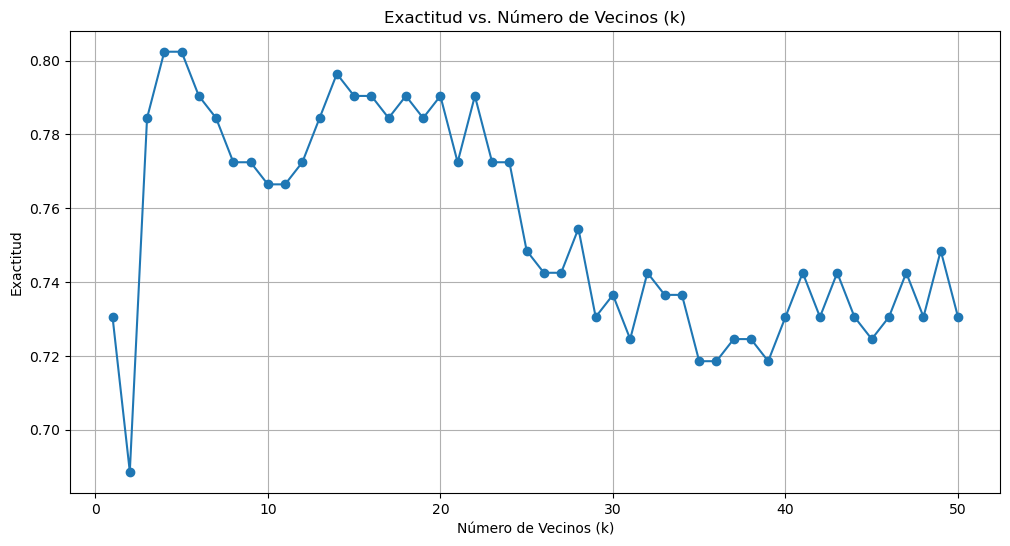

In [18]:
# Definir un rango de valores para "k"
k_values = list(range(1, 51))

# Listas para guardar las exactitudes para cada valor de "k"
accuracies = []

# Para cada valor de "k", entrenar un modelo KNN y evaluar su exactitud
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar la exactitud en función de "k"
plt.figure(figsize=(12, 6))
plt.plot(k_values, accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Número de Vecinos (k)")
plt.xlabel("Número de Vecinos (k)")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()


# Modelo  Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

# Modelo Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=0)  # Puedes ajustar los parámetros según sea necesario

# Entrenar el modelo Random Forest con los datos de entrenamiento
rf_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba
y_pred_rf = rf_model.predict(X_test)


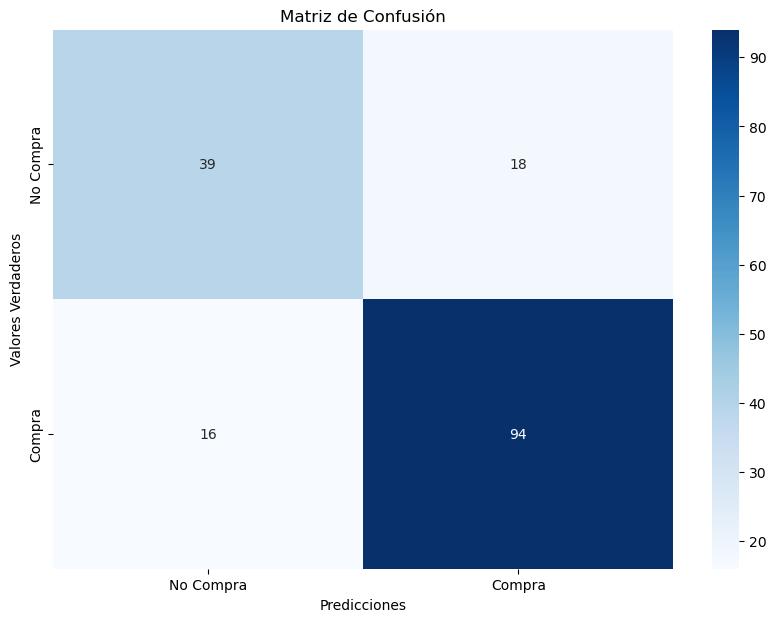

In [36]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que y_test son tus etiquetas verdaderas y y_pred las predicciones de tu modelo
matriz_confusion = confusion_matrix(y_test, y_pred_rf)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['No Compra', 'Compra']

# Crear el heatmap con Seaborn
plt.figure(figsize=(10, 7))
sns.heatmap(matriz_confusion, annot=True, fmt='g', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.xlabel('Predicciones')
plt.ylabel('Valores Verdaderos')
plt.title('Matriz de Confusión')
plt.show()


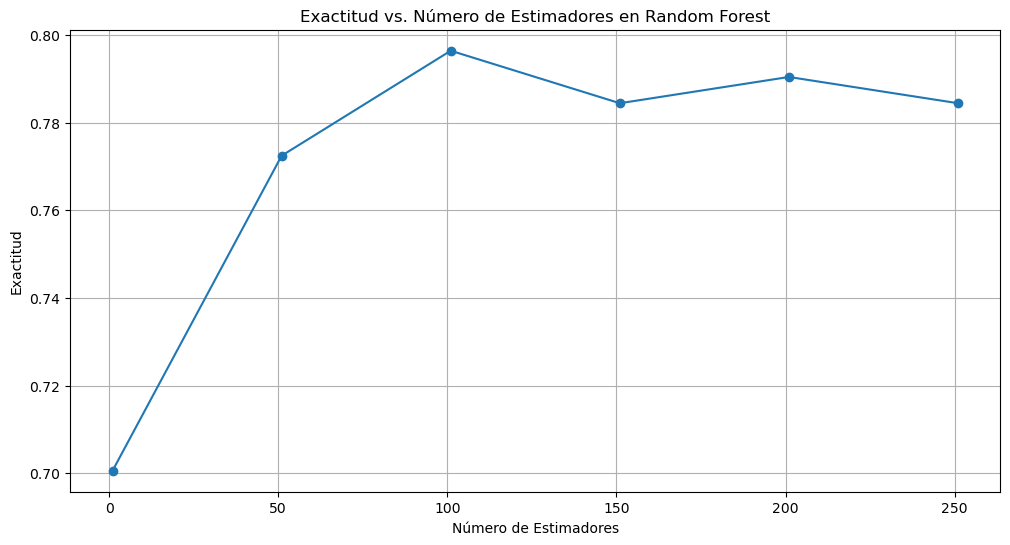

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Definir un rango de valores para el número de árboles en el bosque
n_estimators_values = list(range(1, 301,50))

# Lista para guardar las exactitudes para cada número de árboles
forest_accuracies = []

# Para cada valor de n_estimators, entrenar un modelo Random Forest y evaluar su exactitud
for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=0)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    accuracy_rf = accuracy_score(y_test, y_pred_rf)
    forest_accuracies.append(accuracy_rf)

# Graficar la exactitud en función del número de árboles
plt.figure(figsize=(12, 6))
plt.plot(n_estimators_values, forest_accuracies, marker='o', linestyle='-')
plt.title("Exactitud vs. Número de Estimadores en Random Forest")
plt.xlabel("Número de Estimadores")
plt.ylabel("Exactitud")
plt.grid(True)
plt.show()


# Arboles

In [48]:
from sklearn.tree import DecisionTreeClassifier

# Modelo de Árbol de Decisión
dt_model = DecisionTreeClassifier(random_state=0)  # Puedes ajustar otros parámetros según sea necesario

# Entrenar el modelo de Árbol de Decisión con los datos de entrenamiento
dt_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo de Árbol de Decisión
y_pred_dt = dt_model.predict(X_test)



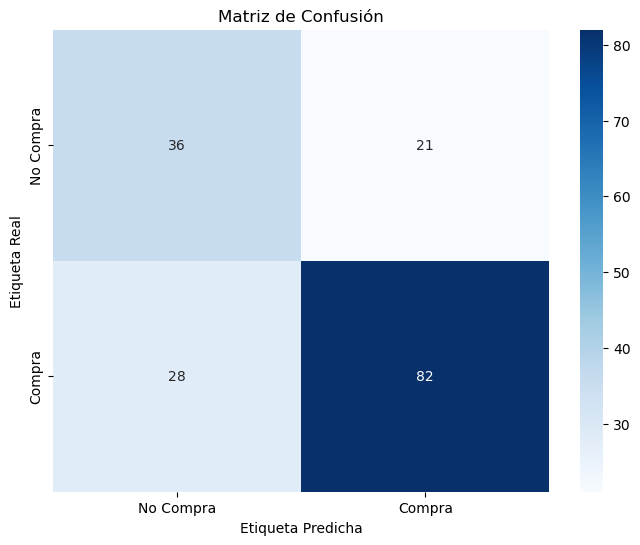

In [43]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns  # Opcional para una visualización más bonita

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred_dt)

# Etiquetas para la matriz de confusión, ajusta estas según tus etiquetas de clase
etiquetas = ['No Compra', 'Compra']

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=etiquetas, yticklabels=etiquetas)  # Usando seaborn para una visualización más bonita
plt.title('Matriz de Confusión')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


## Modelo SVM

In [58]:
from sklearn.svm import SVC

# Modelo SVM
svm_model = SVC(random_state=0)  # Puedes ajustar otros parámetros como 'kernel', 'C', etc.

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir las etiquetas para el conjunto de datos de prueba con el modelo SVM
y_pred_svm = svm_model.predict(X_test)



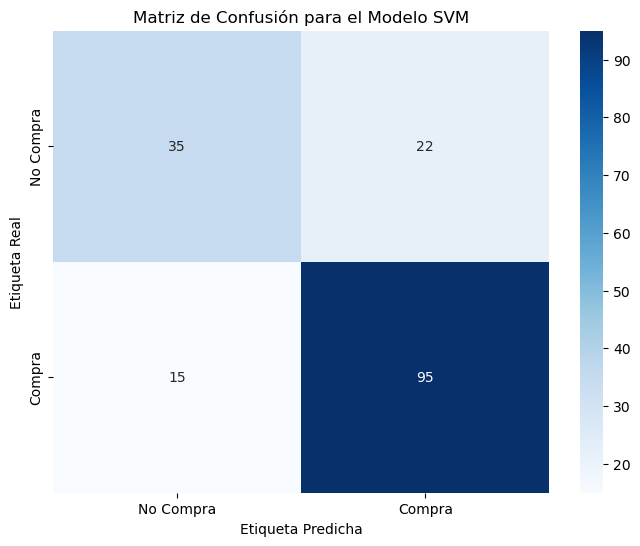

In [59]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Calcular la matriz de confusión para el modelo SVM
cm_svm = confusion_matrix(y_test, y_pred_svm)

# Etiquetas para la matriz de confusión
etiquetas = ['No Compra', 'Compra']

# Graficar la matriz de confusión con etiquetas personalizadas
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', xticklabels=etiquetas, yticklabels=etiquetas)
plt.title('Matriz de Confusión para el Modelo SVM')
plt.ylabel('Etiqueta Real')
plt.xlabel('Etiqueta Predicha')
plt.show()


# Metricas 

# Knn

In [30]:

# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.7844311377245509
              precision    recall  f1-score   support

           0       0.70      0.65      0.67        57
           1       0.82      0.85      0.84       110

    accuracy                           0.78       167
   macro avg       0.76      0.75      0.76       167
weighted avg       0.78      0.78      0.78       167



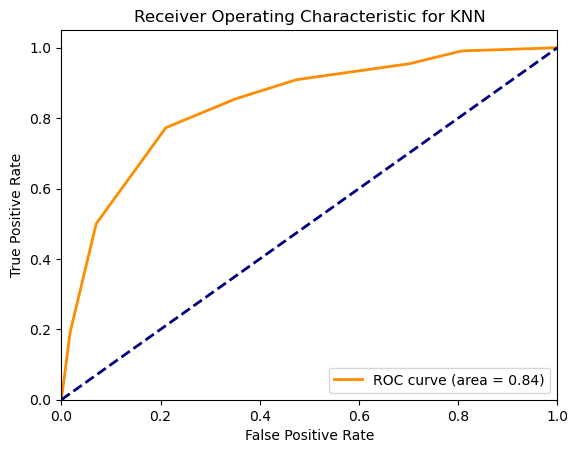

In [33]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Asegúrate de haber entrenado tu modelo KNN como se muestra en tu código

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo KNN
y_pred_prob_knn = knn_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_pred_prob_knn)

# Calcular el Área Bajo la Curva (AUC) para el modelo KNN
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Graficar la curva ROC para el modelo KNN
plt.figure()
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_knn)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for KNN')
plt.legend(loc="lower right")
plt.show()


# Random Forest 

In [28]:

# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Accuracy: 0.7964071856287425
              precision    recall  f1-score   support

           0       0.71      0.68      0.70        57
           1       0.84      0.85      0.85       110

    accuracy                           0.80       167
   macro avg       0.77      0.77      0.77       167
weighted avg       0.79      0.80      0.80       167



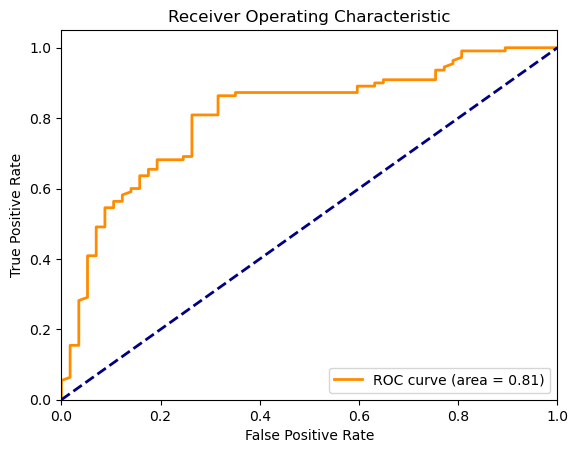

In [56]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba
# Asegúrate de que estás usando el modelo correcto (en este caso, rf_model)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Calcular el Área Bajo la Curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


# Arbol de descicion

In [49]:
# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Accuracy: 0.7065868263473054
              precision    recall  f1-score   support

           0       0.56      0.63      0.60        57
           1       0.80      0.75      0.77       110

    accuracy                           0.71       167
   macro avg       0.68      0.69      0.68       167
weighted avg       0.72      0.71      0.71       167



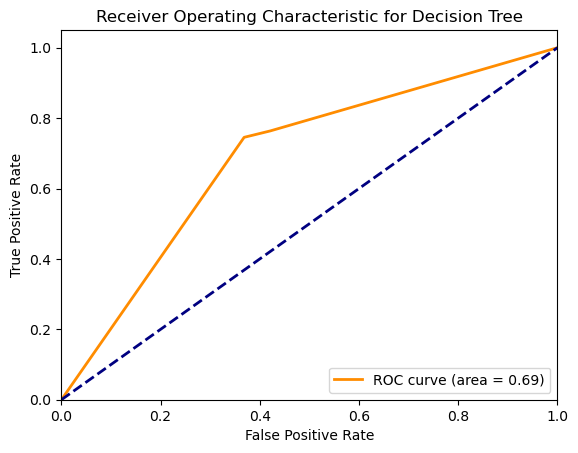

In [50]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo de Árbol de Decisión
# Asegúrate de que estás usando el modelo correcto (en este caso, dt_model)
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calcular el Área Bajo la Curva (AUC) para el modelo de Árbol de Decisión
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Graficar la curva ROC para el modelo de Árbol de Decisión
plt.figure()
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Decision Tree')
plt.legend(loc="lower right")
plt.show()


## SVM 

In [51]:

# Opcional: Evaluar el modelo
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

Accuracy: 0.7784431137724551
              precision    recall  f1-score   support

           0       0.70      0.61      0.65        57
           1       0.81      0.86      0.84       110

    accuracy                           0.78       167
   macro avg       0.76      0.74      0.75       167
weighted avg       0.77      0.78      0.77       167



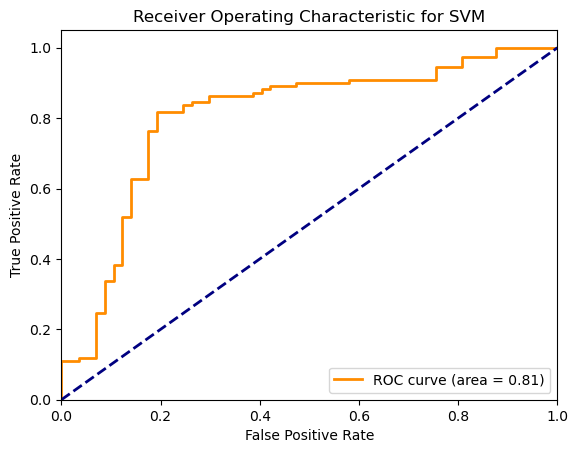

In [53]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Modelo SVM con probabilidades habilitadas
svm_model = SVC(random_state=0, probability=True)  # Habilitar probabilidades

# Entrenar el modelo SVM con los datos de entrenamiento
svm_model.fit(X_train, y_train)

# Predecir las probabilidades para el conjunto de datos de prueba con el modelo SVM
y_pred_prob_svm = svm_model.predict_proba(X_test)[:, 1]  # obtener las probabilidades para la clase positiva

# Calcular los valores de TPR (True Positive Rate) y FPR (False Positive Rate) para varios umbrales
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_prob_svm)

# Calcular el Área Bajo la Curva (AUC) para el modelo SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)

# Graficar la curva ROC para el modelo SVM
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_svm)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for SVM')
plt.legend(loc="lower right")
plt.show()


# Cuva multiple ROC

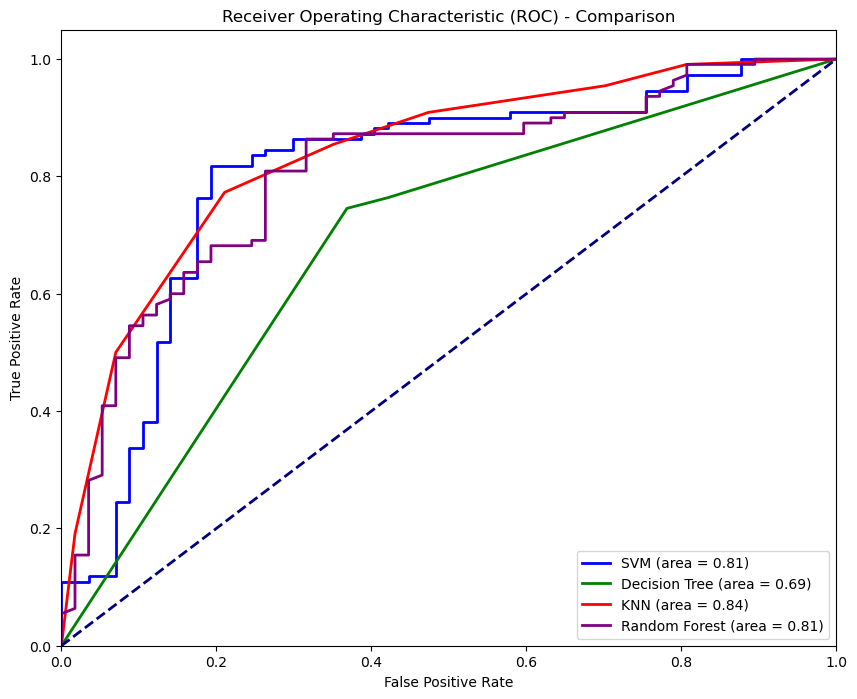

In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Asegúrate de haber calculado previamente y_pred_prob_svm, y_pred_prob_dt, y_pred_prob_knn, y_pred_prob_rf
# para los modelos SVM, Árbol de Decisión, KNN y Random Forest respectivamente

# Calcular curva ROC y AUC para cada modelo
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_pred_prob_svm)
roc_auc_svm = auc(fpr_svm, tpr_svm)

fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_prob_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)

fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_prob_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Graficar todas las curvas ROC en la misma figura
plt.figure(figsize=(10, 8))

plt.plot(fpr_svm, tpr_svm, label='SVM (area = %0.2f)' % roc_auc_svm, color='blue', lw=2)
plt.plot(fpr_dt, tpr_dt, label='Decision Tree (area = %0.2f)' % roc_auc_dt, color='green', lw=2)
plt.plot(fpr_knn, tpr_knn, label='KNN (area = %0.2f)' % roc_auc_knn, color='red', lw=2)
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % roc_auc_rf, color='purple', lw=2)

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) - Comparison')
plt.legend(loc="lower right")
plt.show()
